```
Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         07/06/2020
Name:         David Weon
Worked with:  Adam Rauckhorst, Dyllan Usher
```

# Challenge 1

In [1]:
import pandas as pd
df1 = pd.read_csv('turnstile_200606.txt')
df2 = pd.read_csv('turnstile_200613.txt')
df3 = pd.read_csv('turnstile_200620.txt')
df4 = pd.concat([df1, df2, df3])
df4

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553
...,...,...,...,...,...,...,...,...,...,...,...
206734,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,05:00:00,REGULAR,5554,514
206735,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,09:00:00,REGULAR,5554,514
206736,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,13:00:00,REGULAR,5554,514
206737,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,17:00:00,REGULAR,5554,514


In [2]:
df4.reset_index(inplace=True)

In [3]:
df4.columns = [column.strip() for column in df4.columns]

# Challenge 2

In [4]:
type(df4['DATE'])

pandas.core.series.Series

In [5]:
type(df4['TIME'])

pandas.core.series.Series

In [6]:
pd.to_datetime(df4['DATE'] + ' ' + df4['TIME'])

0        2020-05-30 00:00:00
1        2020-05-30 04:00:00
2        2020-05-30 08:00:00
3        2020-05-30 12:00:00
4        2020-05-30 16:00:00
                 ...        
621288   2020-06-19 05:00:00
621289   2020-06-19 09:00:00
621290   2020-06-19 13:00:00
621291   2020-06-19 17:00:00
621292   2020-06-19 21:00:00
Length: 621293, dtype: datetime64[ns]

In [7]:
df4['DATETIME'] = pd.to_datetime(df4['DATE'] + ' ' + df4['TIME'],
                                 format="%m/%d/%Y %H:%M:%S")
df4

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621288,206734,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,05:00:00,REGULAR,5554,514,2020-06-19 05:00:00
621289,206735,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,09:00:00,REGULAR,5554,514,2020-06-19 09:00:00
621290,206736,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,13:00:00,REGULAR,5554,514,2020-06-19 13:00:00
621291,206737,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,17:00:00,REGULAR,5554,514,2020-06-19 17:00:00


# Challenge 3

In [8]:
#checking for duplicates
(df4.groupby(["C/A", "UNIT", "SCP", "STATION",
              "DATETIME"]).ENTRIES.count().reset_index().sort_values(
                  "ENTRIES", ascending=False).head())

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-05-30 00:00:00,1
414189,R138,R293,00-06-00,34 ST-PENN STA,2020-06-01 18:00:00,1
414191,R138,R293,00-06-00,34 ST-PENN STA,2020-06-02 02:00:00,1
414192,R138,R293,00-06-00,34 ST-PENN STA,2020-06-02 06:00:00,1
414193,R138,R293,00-06-00,34 ST-PENN STA,2020-06-02 10:00:00,1


In [9]:
df4 = df4.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [10]:
turnstiles_daily = (df4.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],
                                as_index=False).ENTRIES.first())

In [11]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(
    ["C/A", "UNIT", "SCP",
     "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [13]:
#counter in reverse?
turnstiles_daily[
    turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
798,A011,R080,01-03-00,57 ST-7 AV,05/31/2020,885664857,05/30/2020,885664914.0
799,A011,R080,01-03-00,57 ST-7 AV,06/01/2020,885664810,05/31/2020,885664857.0
800,A011,R080,01-03-00,57 ST-7 AV,06/02/2020,885664701,06/01/2020,885664810.0
801,A011,R080,01-03-00,57 ST-7 AV,06/03/2020,885664602,06/02/2020,885664701.0
802,A011,R080,01-03-00,57 ST-7 AV,06/04/2020,885664496,06/03/2020,885664602.0


In [14]:
import datetime

mask = ((df4["C/A"] == "A011") & (df4["UNIT"] == "R080") &
        (df4["SCP"] == "01-03-00") & (df4["STATION"] == "57 ST-7 AV") &
        (df4["DATETIME"].dt.date == datetime.datetime(2020, 5, 30).date()))
df4[mask].head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
1596,1596,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,00:00:00,885664914,2020-05-30 00:00:00
1597,1597,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,04:00:00,885664912,2020-05-30 04:00:00
1598,1598,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,08:00:00,885664907,2020-05-30 08:00:00
1599,1599,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,12:00:00,885664900,2020-05-30 12:00:00
1600,1600,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,16:00:00,885664884,2020-05-30 16:00:00


In [15]:
#which stations have this reverse counter problem?
(turnstiles_daily[
    turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].groupby(
        ["C/A", "UNIT", "SCP", "STATION"]).size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         20
A025  R023  01-03-01  34 ST-HERALD SQ    20
A049  R088  02-05-00  CORTLANDT ST        4
A050  R088  00-05-01  CORTLANDT ST        1
A066  R118  00-00-00  CANAL ST           20
                                         ..
R511  R091  00-03-01  36 AV               1
R523  R147  00-00-04  61 ST WOODSIDE     20
R609  R056  01-03-00  NEVINS ST           1
R622  R123  00-00-00  FRANKLIN AV        20
R730  R431  00-00-04  EASTCHSTER/DYRE    20
Length: 75, dtype: int64

In [16]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0?
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


# If counter is > 100000, then the counter might have been reset.
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts,
                                                           axis=1,
                                                           max_counter=100000)

9 563308.0
136 8235039.0
43 572778.0
18 2090862.0
98 1200414.0
2555909 514061.0
37 6871440.0
5 235111076.0
16 1098379.0
40 297222.0
917548 9259448.0
11 110832.0
17580 241931.0
242021 17580.0
32 183579.0
21 216974.0
327738 17046.0
53 249030.0
6 6362738.0
264 371906.0
14 795582.0
28 4362577.0
6118023 39945.0


In [17]:
turnstiles_daily.DAILY_ENTRIES.describe(percentiles=[0.99])

count    98681.000000
mean       153.481916
std        517.795086
min          0.000000
50%         92.000000
99%        819.000000
max      83545.000000
Name: DAILY_ENTRIES, dtype: float64

In [18]:
'''
dropping daily entries over 6000
    :meaning people are going through the turnstile every other second 
    :this is still generous
'''
mask = (turnstiles_daily.DAILY_ENTRIES <= 6000)
turnstiles_daily = turnstiles_daily[mask]
turnstiles_daily.describe()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
count,9.866900e+04,9.866900e+04,98669.000000
mean,4.315253e+07,4.315517e+07,149.056634
std,2.195737e+08,2.195745e+08,177.374094
min,0.000000e+00,0.000000e+00,0.000000
25%,2.976500e+05,2.980810e+05,20.000000
50%,1.832334e+06,1.832335e+06,92.000000
75%,6.468519e+06,6.468985e+06,211.000000
max,2.128761e+09,2.128761e+09,1692.000000


# Challenge 4

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

In [20]:
#selecting one turnstile
filt = ((turnstiles_daily['C/A'] == 'A002')
        & (turnstiles_daily['UNIT'] == 'R051')
        & (turnstiles_daily['SCP'] == '02-00-00')
        & (turnstiles_daily['STATION'] == '59 ST'))

In [21]:
turnstiles_daily[filt]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/31/2020,7420000,05/30/2020,7419887.0,113.0
2,A002,R051,02-00-00,59 ST,06/01/2020,7420099,05/31/2020,7420000.0,99.0
3,A002,R051,02-00-00,59 ST,06/02/2020,7420257,06/01/2020,7420099.0,158.0
4,A002,R051,02-00-00,59 ST,06/03/2020,7420420,06/02/2020,7420257.0,163.0
5,A002,R051,02-00-00,59 ST,06/04/2020,7420584,06/03/2020,7420420.0,164.0
6,A002,R051,02-00-00,59 ST,06/05/2020,7420744,06/04/2020,7420584.0,160.0
7,A002,R051,02-00-00,59 ST,06/06/2020,7420920,06/05/2020,7420744.0,176.0
8,A002,R051,02-00-00,59 ST,06/07/2020,7421025,06/06/2020,7420920.0,105.0
9,A002,R051,02-00-00,59 ST,06/08/2020,7421148,06/07/2020,7421025.0,123.0
10,A002,R051,02-00-00,59 ST,06/09/2020,7421389,06/08/2020,7421148.0,241.0


Text(0.5, 1.0, 'Daily Entries at Turnstile A002 R051 02-00-00 59 ST')

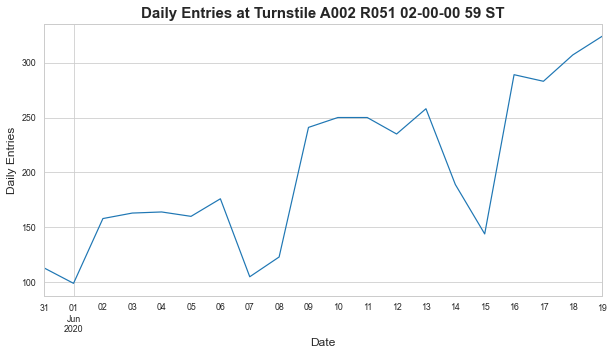

In [22]:
turnstiles_daily['DATE'] = pd.to_datetime(turnstiles_daily['DATE'])
turnstiles_daily[filt].plot(x='DATE',
                            y='DAILY_ENTRIES',
                            kind='line',
                            figsize=(10, 5),
                            legend=False)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Daily Entries at Turnstile A002 R051 02-00-00 59 ST',
          fontsize=15,
          weight='bold')

# Challenge 5

In [23]:
#selecting one turnstile continued
turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION',
                          'DATE']).DAILY_ENTRIES.sum()

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          2020-05-31    1001.0
                            2020-06-01     752.0
                            2020-06-02    1526.0
                            2020-06-03    1630.0
                            2020-06-04    1511.0
                                           ...  
TRAM2  R469  RIT-ROOSEVELT  2020-06-15    1525.0
                            2020-06-16    1022.0
                            2020-06-17    1019.0
                            2020-06-18    1019.0
                            2020-06-19    1085.0
Name: DAILY_ENTRIES, Length: 14964, dtype: float64

# Challenge 6

In [24]:
#selecting stations
turnstiles_daily.groupby(['STATION', 'DATE']).DAILY_ENTRIES.sum()

STATION    DATE      
1 AV       2020-05-31    1335.0
           2020-06-01    1073.0
           2020-06-02    2260.0
           2020-06-03    2346.0
           2020-06-04    2306.0
                          ...  
ZEREGA AV  2020-06-15     253.0
           2020-06-16     589.0
           2020-06-17     509.0
           2020-06-18     619.0
           2020-06-19     602.0
Name: DAILY_ENTRIES, Length: 7577, dtype: float64

# Challenge 7

In [25]:
stations = turnstiles_daily.groupby(['STATION', 'DATE'
                                     ]).DAILY_ENTRIES.sum().reset_index()

In [26]:
filt2 = (stations['STATION'] == '1 AV')

Text(0.5, 1.0, 'Daily Entries at 1 AV Station')

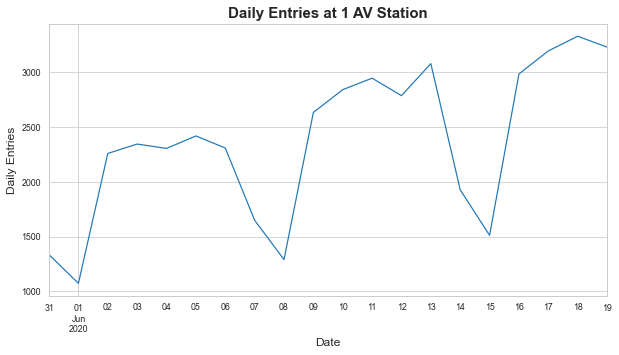

In [27]:
stations['DATE'] = pd.to_datetime(stations['DATE'])
stations[filt2].plot(x='DATE',
                     y='DAILY_ENTRIES',
                     kind='line',
                     figsize=(10, 5),
                     legend=False)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Daily Entries at 1 AV Station', fontsize=15, weight='bold')

# Challenge 8

In [28]:
stations['DATE'] = pd.to_datetime(stations['DATE'])

In [29]:
stations['DAY'] = stations['DATE'].dt.dayofweek

In [30]:
stations['DATE'].dt.week
stations['WEEK_NUMBER'] = stations['DATE'].dt.week
stations.head(50)

,STATION,DATE,DAILY_ENTRIES,DAY,WEEK_NUMBER
0,1 AV,2020-05-31,1335.0,6,22
1,1 AV,2020-06-01,1073.0,0,23
2,1 AV,2020-06-02,2260.0,1,23
3,1 AV,2020-06-03,2346.0,2,23
4,1 AV,2020-06-04,2306.0,3,23
5,1 AV,2020-06-05,2420.0,4,23
6,1 AV,2020-06-06,2310.0,5,23
7,1 AV,2020-06-07,1650.0,6,23
8,1 AV,2020-06-08,1290.0,0,24
9,1 AV,2020-06-09,2635.0,1,24


In [31]:
first_av = stations[filt2]

In [32]:
week23_start = '2020-06-01'
week23_end = '2020-06-07'
week23 = (first_av['DATE'] >= week23_start) & (first_av['DATE'] <= week23_end)
week23_df = first_av.loc[week23]

In [33]:
week23_count_list = []
for elem in week23_df['DAILY_ENTRIES']:
    week23_count_list.append(elem)

week23_count_list

[1073.0, 2260.0, 2346.0, 2306.0, 2420.0, 2310.0, 1650.0]

In [34]:
week24_start = '2020-06-08'
week24_end = '2020-06-14'
week24 = (first_av['DATE'] >= week24_start) & (first_av['DATE'] <= week24_end)
week24_df = first_av.loc[week24]

In [35]:
week24_count_list = []
for elem in week24_df['DAILY_ENTRIES']:
    week24_count_list.append(elem)

week24_count_list

[1290.0, 2635.0, 2843.0, 2948.0, 2788.0, 3081.0, 1928.0]

In [36]:
week25_start = '2020-06-15'
week25_end = '2020-06-21'
week25 = (first_av['DATE'] >= week25_start) & (first_av['DATE'] <= week25_end)
week25_df = first_av.loc[week25]

In [37]:
week25_count_list = []
for elem in week25_df['DAILY_ENTRIES']:
    week25_count_list.append(elem)

week25_count_list

[1512.0, 2986.0, 3197.0, 3331.0, 3232.0]

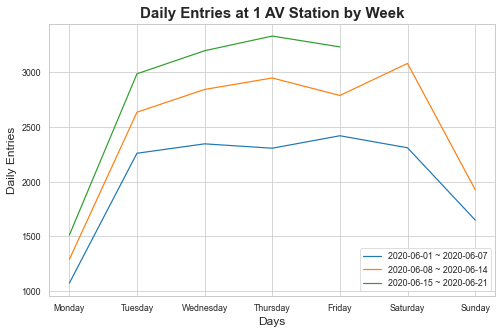

In [38]:
plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 7, 1), [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
plt.xlabel('Days', fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Daily Entries at 1 AV Station by Week', fontsize=15, weight='bold')
plt.plot(week23_count_list, label='2020-06-01 ~ 2020-06-07')
plt.plot(week24_count_list, label='2020-06-08 ~ 2020-06-14')
plt.plot(week25_count_list, label='2020-06-15 ~ 2020-06-21')
plt.legend(loc='lower right')

# Challenge 9

In [39]:
riders_perstation = stations.groupby(['STATION']).DAILY_ENTRIES.sum()

In [40]:
riders_perstation.sort_values(ascending=False)

STATION
125 ST             263462.0
34 ST-PENN STA     256182.0
42 ST-PORT AUTH    207645.0
86 ST              203688.0
34 ST-HERALD SQ    190229.0
                     ...   
BEACH 98 ST          2108.0
BEACH 105 ST         1673.0
BROAD CHANNEL        1038.0
AQUEDUCT RACETR       481.0
ORCHARD BEACH           0.0
Name: DAILY_ENTRIES, Length: 379, dtype: float64

In [41]:
sorted_riders_perstation = riders_perstation.sort_values(ascending=False)

# Challenge 10

In [42]:
riders_perstation_list = []
for elem in riders_perstation:
    riders_perstation_list.append(elem)

<Figure size 720x216 with 0 Axes>

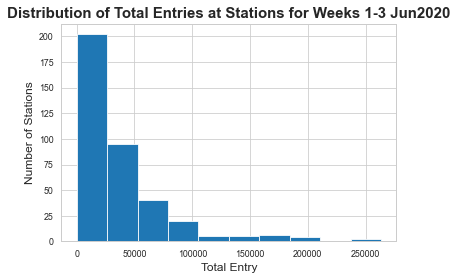

<Figure size 720x216 with 0 Axes>

In [43]:
plt.hist(riders_perstation_list)
plt.xlabel('Total Entry', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.title('Distribution of Total Entries at Stations for Weeks 1-3 Jun2020',
          fontsize=15,
          weight='bold')
plt.figure(figsize=(10, 3))

In [44]:
riders_perstation = riders_perstation.reset_index()

Text(0.5, 1.0, 'Total Entries at Stations for Weeks 1-3 Jun2020')

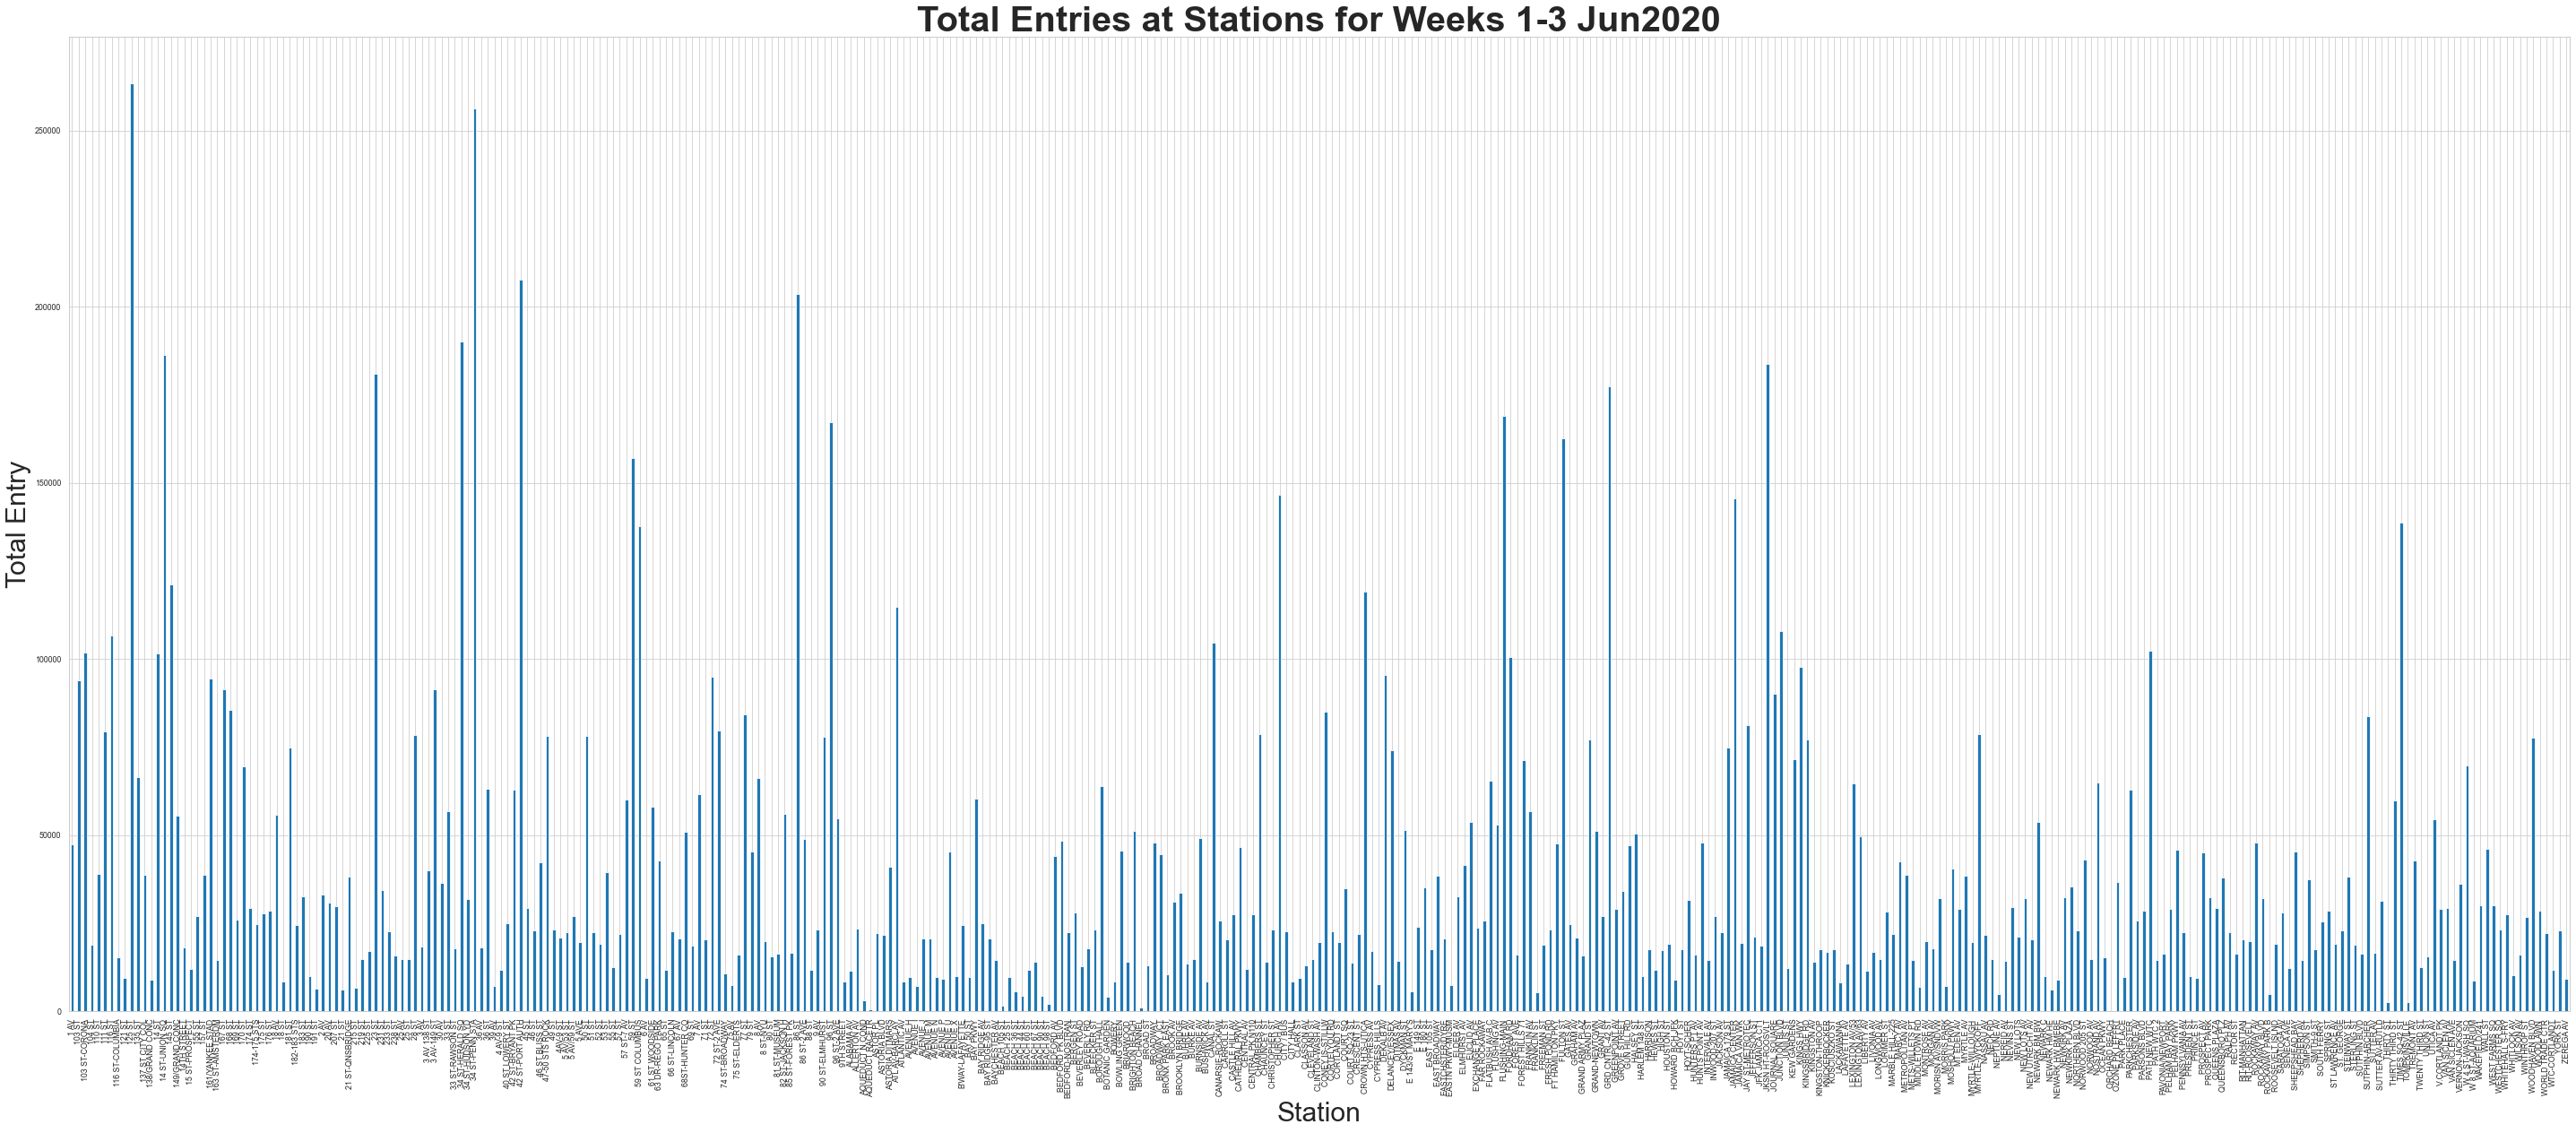

In [45]:
(riders_perstation.plot(x='STATION',
                        y='DAILY_ENTRIES',
                        kind='bar',
                        figsize=(50, 20),
                        legend=False))
plt.xlabel('Station', fontsize=30)
plt.ylabel('Total Entry', fontsize=30)
plt.title('Total Entries at Stations for Weeks 1-3 Jun2020',
          fontsize=40,
          weight='bold')

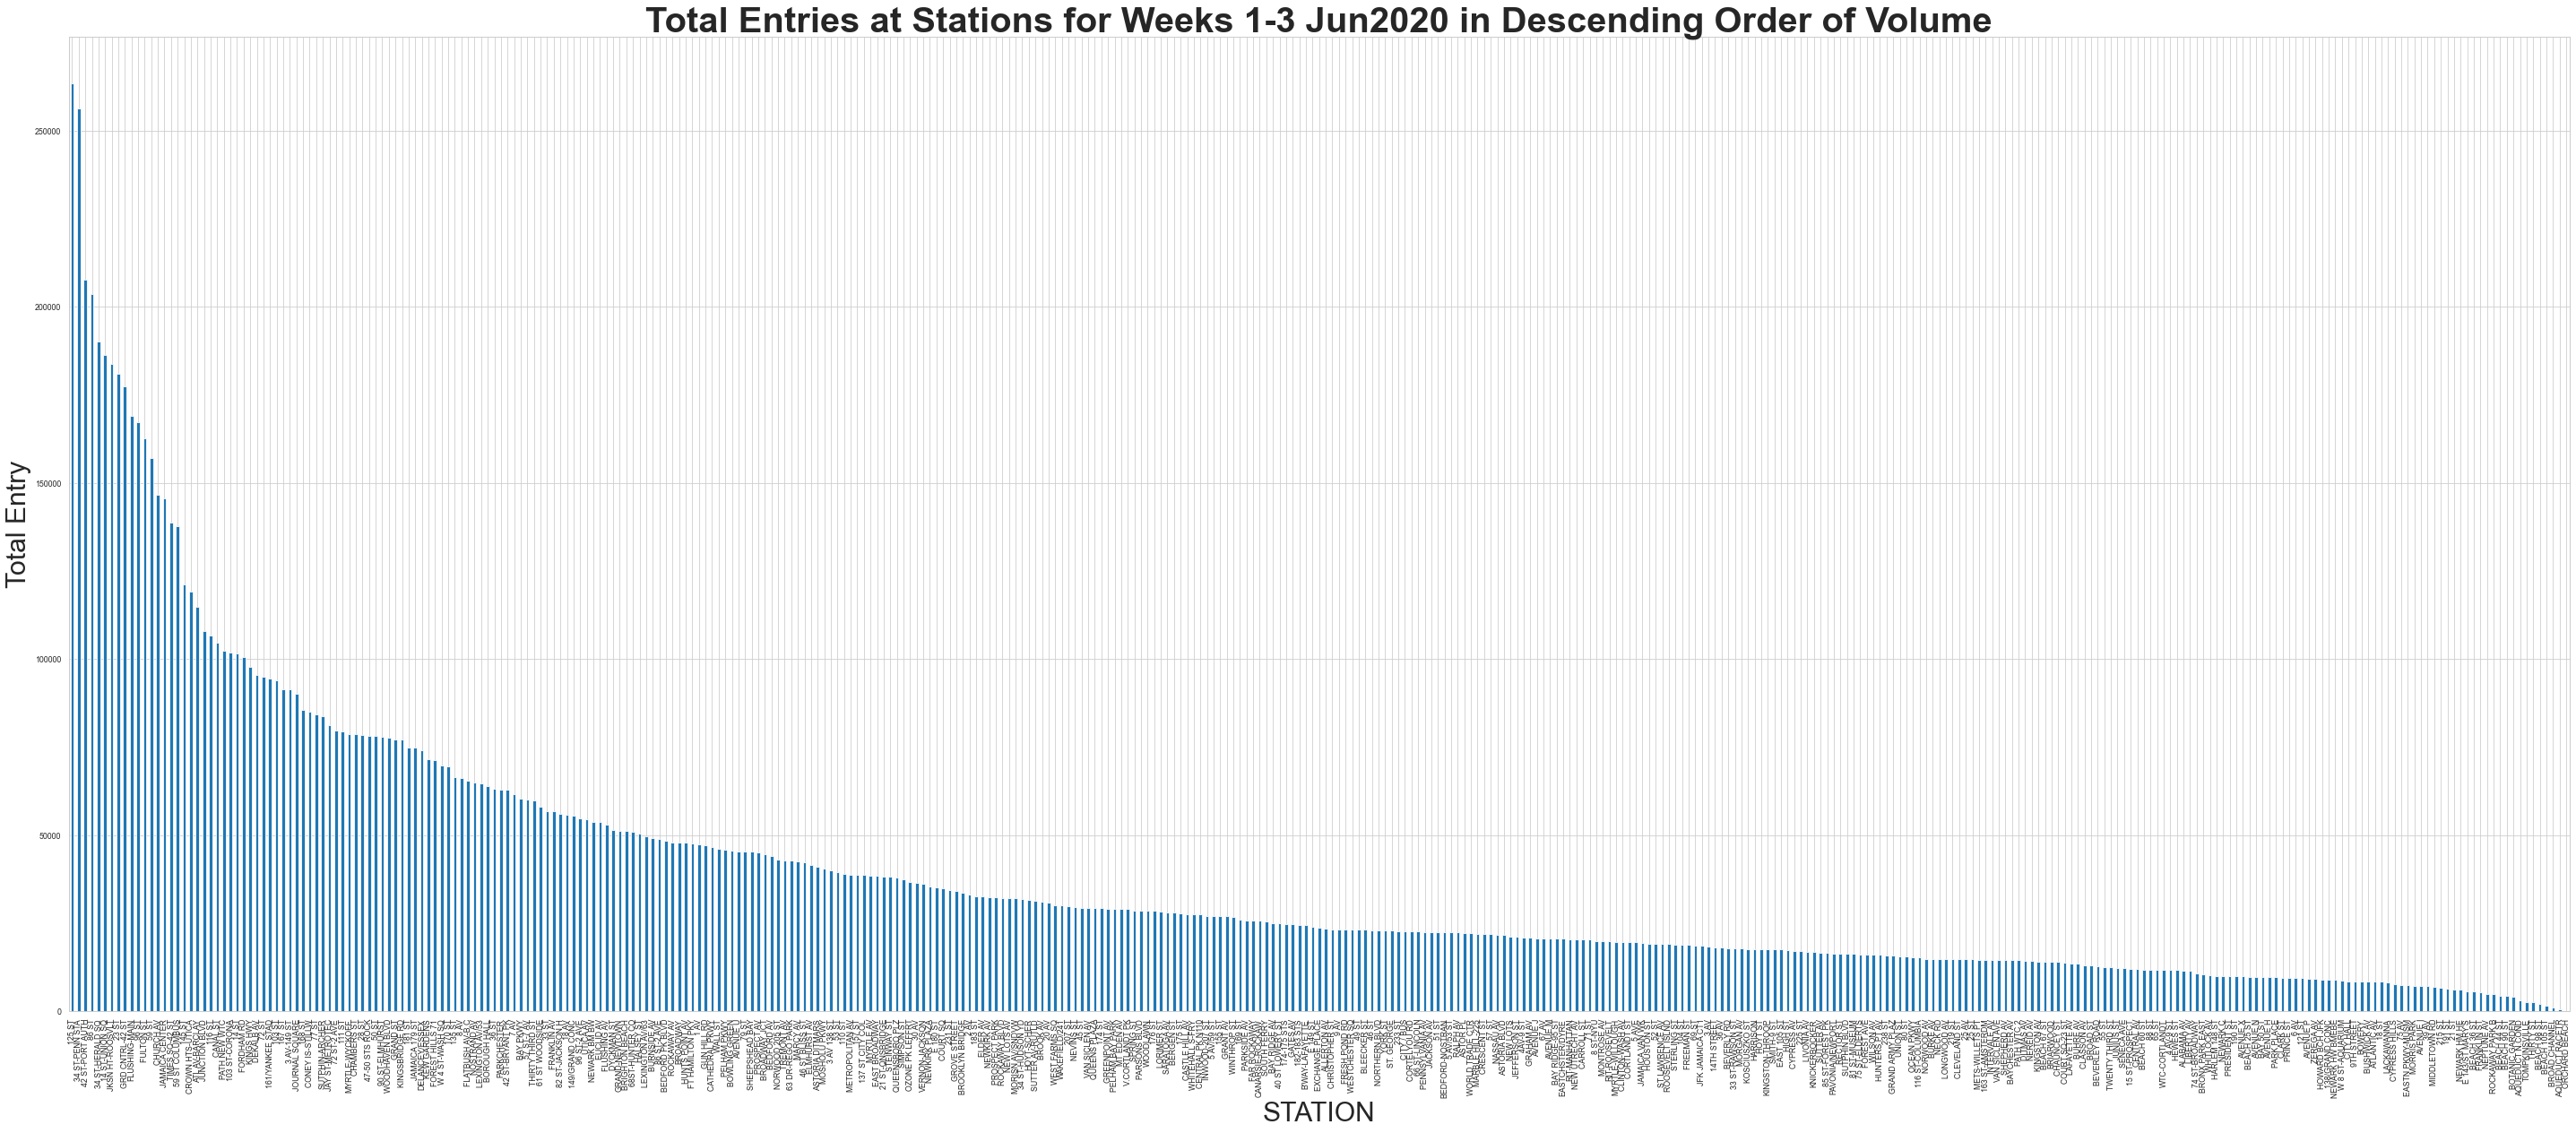

In [46]:
plt.xlabel('Station', fontsize=30)
plt.ylabel('Total Entry', fontsize=30)
plt.title(
    'Total Entries at Stations for Weeks 1-3 Jun2020 in Descending Order of Volume',
    fontsize=40,
    weight='bold')

(sorted_riders_perstation.plot(x='STATION',
                               y='DAILY_ENTRIES',
                               kind='bar',
                               figsize=(50, 20),
                               legend=False))

In [47]:
total_top_10_stations = sorted_riders_perstation.reset_index().head(10)
total_top_10_stations

,STATION,DAILY_ENTRIES
0,125 ST,263462.0
1,34 ST-PENN STA,256182.0
2,42 ST-PORT AUTH,207645.0
3,86 ST,203688.0
4,34 ST-HERALD SQ,190229.0
5,14 ST-UNION SQ,186169.0
6,JKSN HT-ROOSVLT,183761.0
7,23 ST,180883.0
8,GRD CNTRL-42 ST,177389.0
9,FLUSHING-MAIN,169065.0


In [48]:
top_stations = (stations.groupby(
    ['STATION'])['DAILY_ENTRIES'].sum().reset_index().sort_values(
        by='DAILY_ENTRIES', ascending=False).STATION.head(10))
top_stations

9               125 ST
61      34 ST-PENN STA
68     42 ST-PORT AUTH
110              86 ST
59     34 ST-HERALD SQ
14      14 ST-UNION SQ
257    JKSN HT-ROOSVLT
46               23 ST
233    GRD CNTRL-42 ST
217      FLUSHING-MAIN
Name: STATION, dtype: object

In [49]:
dis_top_10_stations = stations[stations['STATION'].isin(top_stations)]
dis_top_10_stations

,STATION,DATE,DAILY_ENTRIES,DAY,WEEK_NUMBER
180,125 ST,2020-05-31,9350.0,6,22
181,125 ST,2020-06-01,7191.0,0,23
182,125 ST,2020-06-02,13847.0,1,23
183,125 ST,2020-06-03,13270.0,2,23
184,125 ST,2020-06-04,12954.0,3,23
...,...,...,...,...,...
5152,JKSN HT-ROOSVLT,2020-06-15,6866.0,0,25
5153,JKSN HT-ROOSVLT,2020-06-16,11521.0,1,25
5154,JKSN HT-ROOSVLT,2020-06-17,11679.0,2,25
5155,JKSN HT-ROOSVLT,2020-06-18,11930.0,3,25


Text(0.5, 1.0, 'Distribution of Daily Entries by Station for Top 10 Stations by Volume')

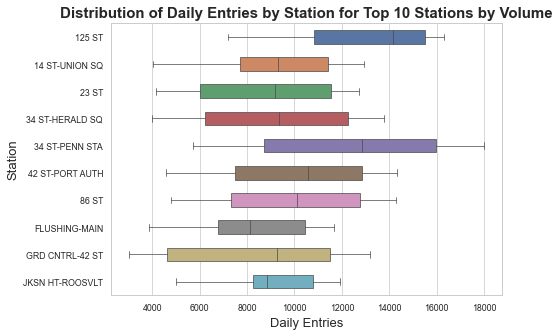

In [50]:
plt.figure(figsize=(7, 5))
b = sns.boxplot('DAILY_ENTRIES',
                'STATION',
                data=dis_top_10_stations,
                width=0.5,
                linewidth=0.7,
                palette='deep')
b.set_ylabel('Station', fontsize=13)
b.set_xlabel('Daily Entries', fontsize=13)
b.axes.set_title(
    'Distribution of Daily Entries by Station for Top 10 Stations by Volume',
    fontsize=15,
    weight='bold')